# Shannon's Sampling

Shannon's sampling theorem is the gold standard for sampling bandlimited signals.

**Theorem** (Shannon's Sampling Theorem) <br>
If a signal $x$ contains no frequencies higher than $f_N$, it is completely described by giving its ordinates at a series of points spaced $\frac{1}{2f_N}$ apart.

***Checkpoint:*** Can you think of a proof or a proof sketch for Shannon's sampling theorem?

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

Let's use the plotting function defined in earlier sessions.

In [3]:
def plot_signal(x, y, ax=None, plot_colour='blue', xaxis_label=None,
                yaxis_label=None, legend_label=None, save=None):
    if ax is None:
        fig = plt.figure(figsize=(12,6))
        ax = plt.gca()
        
    plt.plot(x, y, color=plot_colour, label=legend_label)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    if legend_label:
        plt.legend(ncol=1, loc="upper right", frameon=True,
                   framealpha=0.8, facecolor='white')
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
        
    return

## Bandlimited Signals

We will start with defining some known bandlimited signals like the sinusoidal signal and their linear combinations.

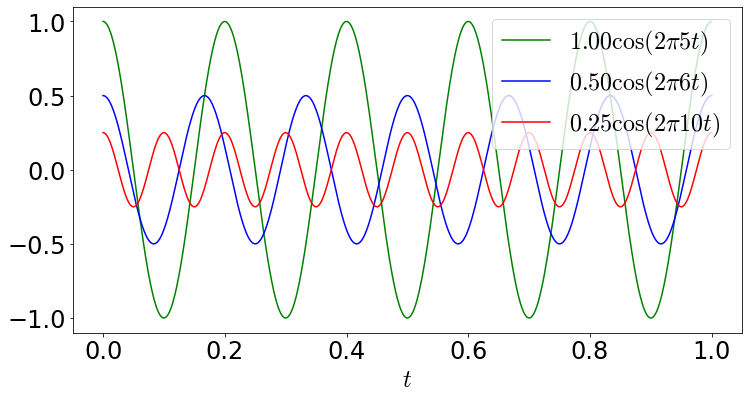

In [4]:
t_continuous = np.linspace(0,1,1000)

cosine = lambda A, f, t: A*np.cos(2*np.pi*f*t)

fig = plt.figure(figsize=(12,6))
ax = plt.gca()
plot_signal(t_continuous, cosine(1.0, 5, t_continuous), ax=ax,
            plot_colour='green', xaxis_label=r"$t$",
            legend_label=r"$1.00\cos(2\pi 5t)$")
plot_signal(t_continuous, cosine(0.5, 6, t_continuous), ax=ax,
            plot_colour='blue', xaxis_label=r"$t$",
            legend_label=r"$0.50\cos(2\pi 6t)$")
plot_signal(t_continuous, cosine(0.25, 10, t_continuous), ax=ax,
            plot_colour='red', xaxis_label=r"$t$",
            legend_label=r"$0.25\cos(2\pi 10t)$")

Let's compose a bandlimited signal by adding the cosine signals together, i.e., we define

\begin{equation}
    y(t) = \cos(2\pi 5t) + 0.5\cos(2\pi 6t) + 0.25\cos(2\pi 10t)
\end{equation}

Since the maximum frequency in the signal is $10$ Hz, the Nyquist frequency of the signal is $10$ Hz.

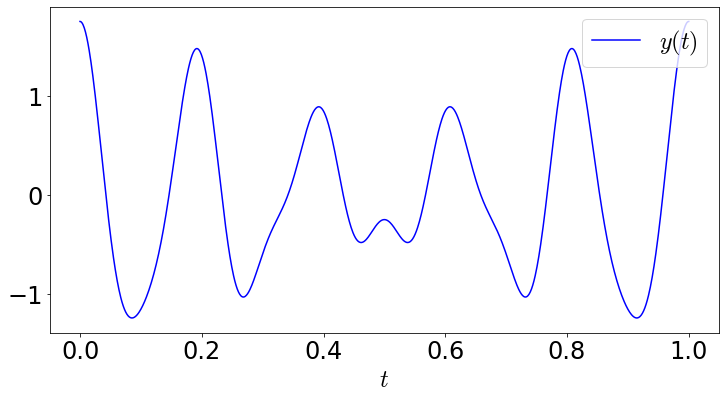

In [5]:
signal = cosine(1.0, 5, t_continuous) + cosine(.5, 6, t_continuous) \
            + cosine(.25, 10, t_continuous)
plot_signal(t_continuous, signal, plot_colour='blue',
            xaxis_label=r"$t$", legend_label=r"$y(t)$")

We can verify that the signal $y$ is bandlimited by plotting the spectrum of the signal.

In [6]:
def plot_spec(x, Fs, max_freq=None, ax=None, plot_colour='blue',
              xaxis_label=None, yaxis_label=None, legend_label=None):
    if ax is None:
        fig = plt.figure(figsize=(12,6))
        ax = plt.gca()
        
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C])
    N = Fs * np.arange(0,C) / len(x);
    
    markerline, stemlines, baseline = plt.stem(N, X, label=legend_label)
    plt.setp(stemlines, linewidth=2, color=plot_colour)
    plt.setp(markerline, marker='o', linewidth=2,
        markersize=10, markerfacecolor=plot_colour,
        mec=plot_colour)
    plt.setp(baseline, linewidth=1)
    
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    if legend_label:
        plt.legend(ncol=3, loc="upper right", frameon=True,
                   framealpha=0.8, facecolor='white')
        
    return

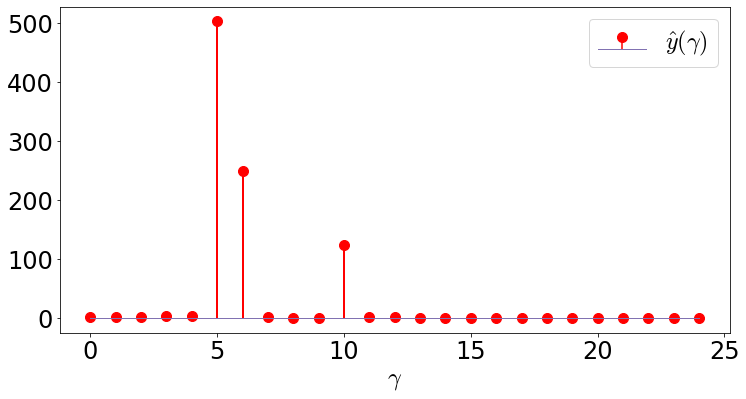

In [7]:
plot_spec(signal, len(t_continuous), max_freq=25, plot_colour='red',
          xaxis_label=r"$\gamma$", legend_label=r"$\hat{y}(\gamma)$")

The spectrum is non-zero at frequencies corresponding to the frequencies contained in the signal at $5$ Hz, $6$ Hz and $10$ Hz. But let's analyse this a little more.

***Checkpoint***:
 - Is the signal $x_1(t) = \cos(2\pi 10 t)$ bandlimited? If yes, what is its bandwidth?
 - Is the signal $x_2(t) = \cos(2\pi 10 t) (u(t) - u(t-1))$ bandlimited? If yes, what is its bandwidth?
 
With this, comment why the FFT approximation to the  Fourier transform is correct in the case above when the signals are sinusoidal.

## Sampling Bandlimited Signals

Now, let's try sampling the signal. We can use the same inline function "cosine" to define the sampled signals. Let's first write a function to plot the discrete signals.

In [8]:
def plot_stem(x, y, ax=None, plot_colour='blue', legend_label=None,
    title_text=None, xaxis_label=None, yaxis_label=None):
    if ax is None:
        fig = plt.figure(figsize=(12,6))
        ax = plt.gca()

    markerline, stemlines, baseline = plt.stem(x, y, label=legend_label)
    plt.setp(stemlines, linewidth=2, color=plot_colour)
    plt.setp(markerline, marker='o', linewidth=2,
        markersize=10, markerfacecolor=plot_colour,
        mec=plot_colour)
    plt.setp(baseline, linewidth=1)

    if legend_label:
        plt.legend(ncol=3, loc="upper right", frameon=True,
                   framealpha=0.8, facecolor='white')

    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)

    return

Let's sample the signal with varying sampling frequencies, under sampling, critical sampling and oversampling, and observe what happens to the spectrum.

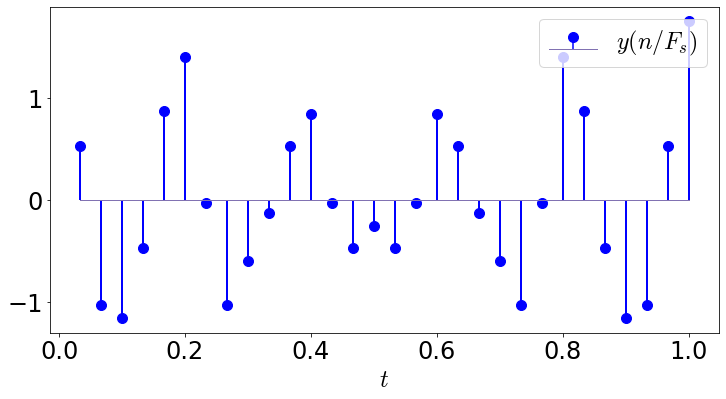

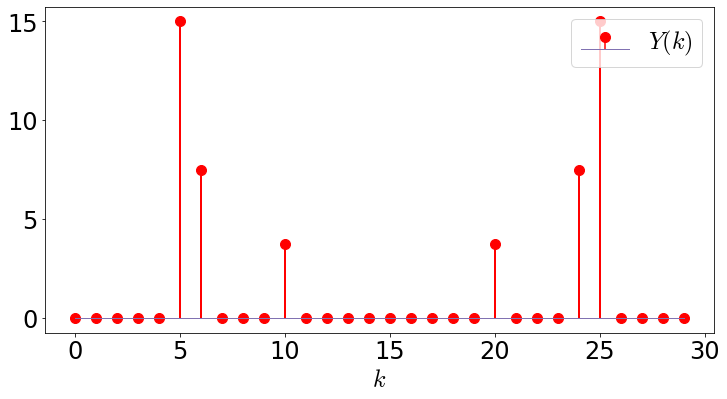

In [23]:
Fs = 30
t_discrete = np.arange(1,Fs+1)
sampled_signal = cosine(1.0, 5/Fs, t_discrete)\
            + cosine(.5, 6/Fs, t_discrete) \
            + cosine(.25, 10/Fs, t_discrete)

plot_stem(t_discrete/Fs, sampled_signal,
          xaxis_label=r"$t$", legend_label=r"$y(n/F_s)$")

plot_spec(sampled_signal, len(t_discrete), max_freq=Fs,
         plot_colour='red', xaxis_label=r"$k$", legend_label=r"$Y(k)$")

## Signal Reconstruction

To reconstruct the signal, using the Shannon-Whittaker interpolation formula, we need an ideal lowpass filter. Let us see other interpolation methods, like linear interpolation $\bar{y}$. This is built in to the plot function in matplotlib.

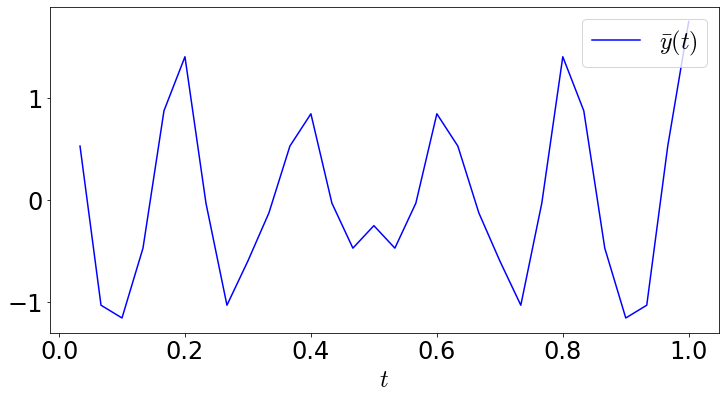

In [10]:
plot_signal(t_discrete/max(t_discrete), sampled_signal,
            xaxis_label=r"$t$", legend_label=r"$\bar{y}(t)$")

The reconstruction is not accurate, but it fairly approximates the bandlimited signal. We also see that the linearly interpolated signal and the bandlimited signal, both, are consistent with the samples -- which brings us back to the fact that sampling is inherently ill-posed. There are more than one way to recover a continuous-time signal from discrete samples.

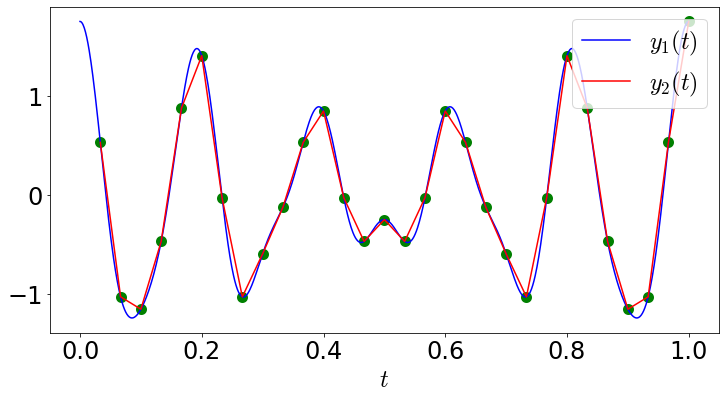

In [18]:
fig = plt.figure(figsize=(12,6))
ax = plt.gca()

plot_signal(t_continuous, signal, ax=ax, plot_colour='blue',
           legend_label=r"$y_{1}(t)$")
plot_signal(t_discrete/max(t_discrete), sampled_signal, ax=ax,
            plot_colour='red', xaxis_label=r"$t$",
            legend_label=r"$y_{2}(t)$")
ax.scatter(t_discrete/max(t_discrete), sampled_signal,
           color='green', linewidth=5)

**Checkpoint:**
- Can linearly interpolated signals be bandlimited signals?
- What type of signals can be sampled and perfectly reconstructed by linear interpolation?
- Can you think of a generalisation to Shannon's sampling framework that includes linearly interpolated signals?